# Introdução à séries temporais(time series)

#### Para acessar o material em vídeo no Youtube: [Introdução à séries temporais](https://youtu.be/Spg1XND1lpE)

## Definição

Séries temporais são dados coletados em intervalos regulares de tempo. Esses dados possuem dependência com a ordem e com eles podemos observar em que data esses dados decrescem ou crescem.
Usamos séries temporais comumente para entender em que dias, meses ou anos, os valores são alterados e porque são alterados. Por exemplo, em uma sorveteria podemos analisar em que dias da semana as vendas são maiores, em quais meses as vendas aumentam e a partir disso podemos inferir informações, como que, os sorvetes vendem mais no verão.

## Padrões

Em séries temporais podemos extrair padrões, esses padrões são:<br>
**Sazonalidade:** Padrão que se repete.<br>
Exemplo: Em um terminal de ônibus durante a semana, a circulação de pessoas é maior às 19h da noite, que é o horário em que trabalhadores estão saindo do serviço.<br>

**Ciclos:** Padrões que ocorrem eventualmente.<br>
Exemplo: No mesmo mesmo terminal de ônibus, em um feriado na semana, a circulação de pessoas decresce às 19h<br>

**Tendência:** Nos ajuda a visualizar e entender qual a tendência dos nosso dados, se eles crescem no decorrer do tempo ou decrescem.
Exemplo: Em julho a circulação de pessoas aumentam no terminal, porque muitas pessoas estão de férias, então saem mais. Ou seja, em julho, nossos dados tendem positivamente.

**Ruídos:** São os dados que não se incluem nos padrões.

## Mãos na massa

### Importações


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

%matplotlib inline

### Conhecendo a base de dados
Nossa base de dados é extraída do [kaggle](https://www.kaggle.com/gpreda/covid-world-vaccination-progress/discussion/241619). Ela já está tratada, para operarmos somente com as séries temporais. Nela temos dois atributos, date(data da coleta) e daily_vaccinations(quantidade de vacinas aplicadas naquele dia).

In [2]:
df = pd.read_csv('progresso-brasil.csv')
df.head()

,Unnamed: 0,date,daily_vaccinations
0,0,2021-01-17,112
1,1,2021-01-18,554
2,2,2021-01-19,3823
3,3,2021-01-20,7136
4,4,2021-01-21,27304


In [3]:
df = df.iloc[:,1:]
df.head()

,date,daily_vaccinations
0,2021-01-17,112
1,2021-01-18,554
2,2021-01-19,3823
3,2021-01-20,7136
4,2021-01-21,27304


Vamos verificar os tipos dos nossos dados.

In [4]:
df.dtypes

date                  object
daily_vaccinations     int64
dtype: object

Vamos alterar o tipo do atributo date para poder usá-lo.

In [5]:
df.date = pd.to_datetime(df.date)
df.dtypes

date                  datetime64[ns]
daily_vaccinations             int64
dtype: object

### Visualizando o comportamento dos dados

Vamos tornar a data, o índice do nosso dataframe.

In [6]:
df.set_index('date',inplace=True)
df

,daily_vaccinations
date,
2021-01-17,112
2021-01-18,554
2021-01-19,3823
2021-01-20,7136
2021-01-21,27304
...,...
2021-07-08,1242514
2021-07-09,1307672
2021-07-11,1307796


**Agora, podemos observar os meses em que a quantidade de vacinas aplicadas por dia descresce.**

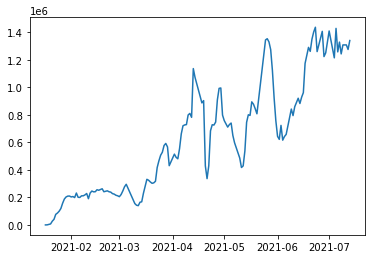

In [7]:
plt.plot(df.index, df.daily_vaccinations)

#### Identificando padrões

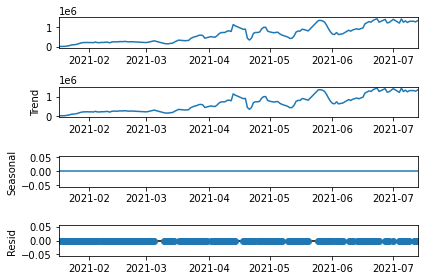

In [8]:
decompose = seasonal_decompose(df, period=1)

decompose.plot();

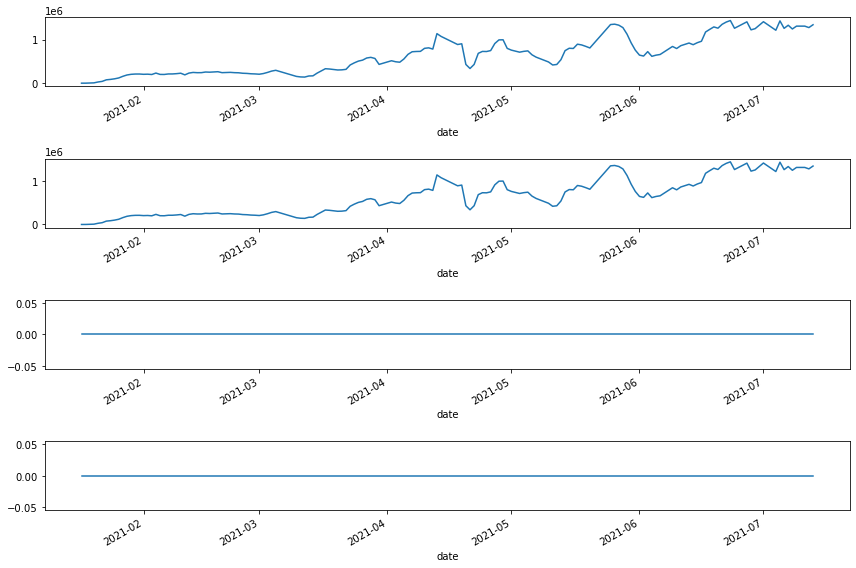

In [9]:
fig, (ax1,ax2,ax3, ax4) = plt.subplots(4,1, figsize=(12,8))
decompose.observed.plot(ax=ax1)
decompose.trend.plot(ax=ax2)
decompose.seasonal.plot(ax=ax3)
decompose.resid.plot(ax=ax4)
plt.tight_layout();

### Visualizando os dados de outra forma

Podemos enriquecer as informações que queremos extrair, substituindo a coluna date por year, month, day e day of week. Com o seguinte comando podemos extrair esses tipos de informações do atributo date. Mas para isso, precisamos do nosso dataframe inicial.

In [10]:
df_ = pd.read_csv('progresso-brasil.csv')
df_ = df_.iloc[:,1:]
df_.date = pd.to_datetime(df_.date)


df_.head()

,date,daily_vaccinations
0,2021-01-17,112
1,2021-01-18,554
2,2021-01-19,3823
3,2021-01-20,7136
4,2021-01-21,27304


Dessa forma conseguimos separar as informações da coluna data

In [11]:
df_.date.dt.year

0      2021
1      2021
2      2021
3      2021
4      2021
       ... 
149    2021
150    2021
151    2021
152    2021
153    2021
Name: date, Length: 154, dtype: int64

In [12]:
df_['year'] = df_.date.dt.year
df_['month'] = df_.date.dt.month
df_['day'] = df_.date.dt.day
df_['day_of_week'] = df_.date.dt.dayofweek
df_.head()

,date,daily_vaccinations,year,month,day,day_of_week
0,2021-01-17,112,2021,1,17,6
1,2021-01-18,554,2021,1,18,0
2,2021-01-19,3823,2021,1,19,1
3,2021-01-20,7136,2021,1,20,2
4,2021-01-21,27304,2021,1,21,3


Agora não precisamos mais do atributo date, por isso vamos removê-lo.

In [13]:
df_.drop(columns='date', inplace = True)
df_.head()

,daily_vaccinations,year,month,day,day_of_week
0,112,2021,1,17,6
1,554,2021,1,18,0
2,3823,2021,1,19,1
3,7136,2021,1,20,2
4,27304,2021,1,21,3


Na coluna day_of_week, os valores de 0 à 4 indicam os dias da semana, enquanto 5 e 6 representam sábado e domingo.
Podemos enriquecer mais ainda esse dados, adicionando uma coluna weekend, indicando se naquela data pertece a semana ou ao fim de semana.

In [14]:
df_['weekend'] = 0
df_.loc[(df_.day_of_week == 5) | (df_.day_of_week == 6), 'weekend'] = 1
df_.head()

,daily_vaccinations,year,month,day,day_of_week,weekend
0,112,2021,1,17,6,1
1,554,2021,1,18,0,0
2,3823,2021,1,19,1,0
3,7136,2021,1,20,2,0
4,27304,2021,1,21,3,0


Agora temos 1 indicando que a data é final de semana e 0 dia da semana. Vamos usar essa informação, para saber o quanto que as vacinas são aplicadas na semana e no final de semana.

In [15]:
df_.weekend.value_counts()

0    114
1     40
Name: weekend, dtype: int64

<AxesSubplot:xlabel='weekend'>

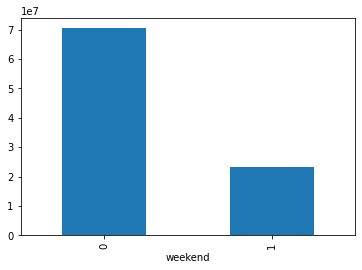

In [16]:
df_.groupby('weekend').daily_vaccinations.sum().plot.bar()

É interessante que também saibamos o quanto tem sido aplicado por mês. Por isso, vamos agrupar a quantidade de vacinas aplicadas por mês.

In [17]:
df_.groupby('month').daily_vaccinations.sum()

month
1     1430187
2     6379701
3     8682407
4    19040096
5    20658203
6    24373563
7    13108525
Name: daily_vaccinations, dtype: int64

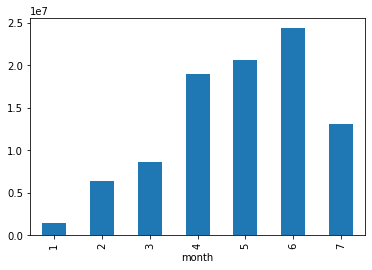

In [18]:
df_.groupby('month').daily_vaccinations.sum().plot.bar();

O gráfico apresenta o quanto a aplicação da vacina tem crescido ao longo desses meses.

## Referências

[Demistificando Séries temporais - Fernando Amaral](https://www.youtube.com/watch?v=0RbUk3pjSKY)

[#PYRENTENA - Introdução às Séries Temporais (Time Series)](https://www.youtube.com/watch?v=HCT0J5DGgrY&t=2287s)

#### Para acessar o material em vídeo no Youtube: 

[Introdução à séries temporais](https://youtu.be/Spg1XND1lpE)
